In [160]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [161]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [162]:
df = pd.read_excel(files[8])
print(df.columns)
df.columns = ['year', 'people', 'sales']
df.head()

Index(['年', '入場者数（人）', '売上高（百万円）'], dtype='object')


,year,people,sales
0,2000,55928443,298532
1,2001,59224753,363039
2,2002,73263027,446386
3,2003,75357835,427158
4,2004,72640170,410826


In [163]:
df['people_index'] = df['people'] / df.loc[0, 'people'] * 100
df['sales_index'] = df['sales'] / df.loc[0, 'sales'] * 100
df

,year,people,sales,people_index,sales_index
0,2000,55928443,298532,100.000000,100.000000
1,2001,59224753,363039,105.893799,121.608069
2,2002,73263027,446386,130.994219,149.527019
3,2003,75357835,427158,134.739733,143.086168
4,2004,72640170,410826,129.880551,137.615398
5,2005,70832169,405003,126.647847,135.664853
6,2006,71368426,422021,127.606674,141.365415
7,2007,71466160,441710,127.781422,147.960688
8,2008,70244323,456397,125.596779,152.880428
9,2009,66912870,438443,119.640144,146.866333


In [164]:
df['people_increase_rate'] = (df['people'] - df.loc[0, 'people']) / df.loc[0, 'people'] * 100
df['sales_increase_rate'] = (df['sales'] - df.loc[0, 'sales']) / df.loc[0, 'sales'] * 100
df

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019
3,2003,75357835,427158,134.739733,143.086168,34.739733,43.086168
4,2004,72640170,410826,129.880551,137.615398,29.880551,37.615398
5,2005,70832169,405003,126.647847,135.664853,26.647847,35.664853
6,2006,71368426,422021,127.606674,141.365415,27.606674,41.365415
7,2007,71466160,441710,127.781422,147.960688,27.781422,47.960688
8,2008,70244323,456397,125.596779,152.880428,25.596779,52.880428
9,2009,66912870,438443,119.640144,146.866333,19.640144,46.866333


In [165]:
for i in range(len(df.index)):
    if i == 0:
        tmp = (df.iloc[i, 1] - df.iloc[i, 1]) / df.iloc[i, 1]
    else:
        tmp = (df.iloc[i, 1] - df.iloc[i-1, 1]) / df.iloc[i-1, 1]
    df.loc[i, 'people_growth_rate'] = tmp
df
for i in range(len(df.index)):
    if i == 0:
        tmp = (df.iloc[i, 2] - df.iloc[i, 2]) / df.iloc[i, 2]
    else:
        tmp = (df.iloc[i, 2] - df.iloc[i-1, 2]) / df.iloc[i-1, 2]
    df.loc[i, 'sales_growth_rate'] = tmp
df

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate,people_growth_rate,sales_growth_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069,0.058938,0.216081
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019,0.237034,0.229581
3,2003,75357835,427158,134.739733,143.086168,34.739733,43.086168,0.028593,-0.043075
4,2004,72640170,410826,129.880551,137.615398,29.880551,37.615398,-0.036063,-0.038234
5,2005,70832169,405003,126.647847,135.664853,26.647847,35.664853,-0.024890,-0.014174
6,2006,71368426,422021,127.606674,141.365415,27.606674,41.365415,0.007571,0.042019
7,2007,71466160,441710,127.781422,147.960688,27.781422,47.960688,0.001369,0.046654
8,2008,70244323,456397,125.596779,152.880428,25.596779,52.880428,-0.017097,0.033250
9,2009,66912870,438443,119.640144,146.866333,19.640144,46.866333,-0.047427,-0.039339


In [166]:
df.head(3)

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate,people_growth_rate,sales_growth_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069,0.058938,0.216081
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019,0.237034,0.229581


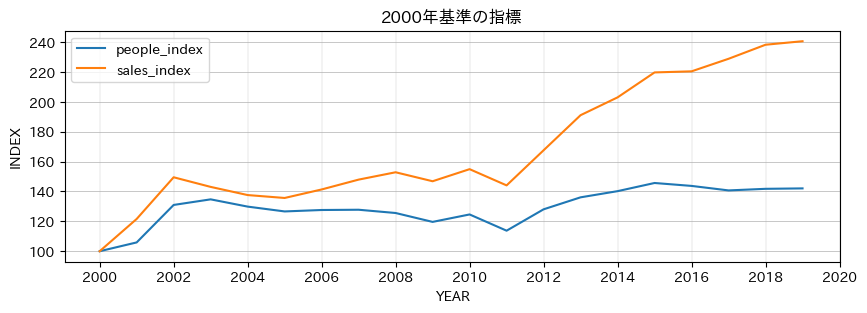

In [211]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_index'], label='people_index')
plt.plot(df['year'], df['sales_index'], label='sales_index')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('2000年基準の指標')
plt.xlabel('YEAR')
plt.ylabel('INDEX')
plt.grid(axis='x', linewidth=0.2)
plt.grid(axis='y', linewidth=0.5)
plt.legend()
plt.show()

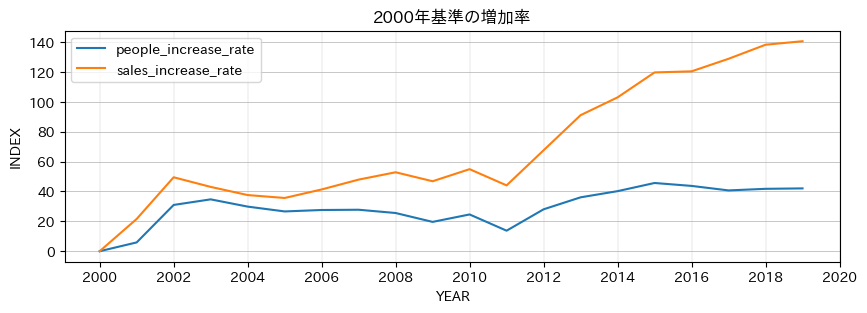

In [212]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_increase_rate'], label='people_increase_rate')
plt.plot(df['year'], df['sales_increase_rate'], label='sales_increase_rate')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('2000年基準の増加率')
plt.xlabel('YEAR')
plt.ylabel('INDEX')
plt.grid(axis='x', linewidth=0.2)
plt.grid(axis='y', linewidth=0.5)
plt.legend()
plt.show()

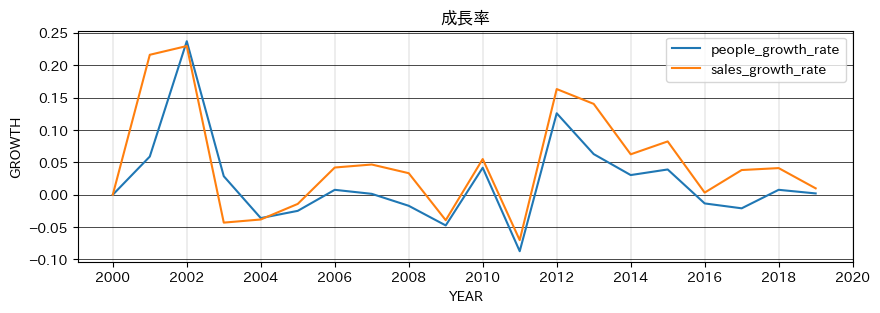

In [230]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_growth_rate'], label='people_growth_rate')
plt.plot(df['year'], df['sales_growth_rate'], label='sales_growth_rate')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('成長率')
plt.xlabel('YEAR')
plt.ylabel('GROWTH')
plt.grid(axis='x', linewidth=0.1, color='k', linestyle='-',)
plt.grid(axis='y', linewidth=0.5, color='k', linestyle='-',)
plt.legend()
plt.show()